In [7]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
with open('cvx_results_eval.pkl', 'rb') as file:
    results = pickle.load(file)

In [9]:
import pandas as pd
results_lists = []
for res in results:
    res_dict = dict(
        data=res['data'],
        emb_dim=res['emb_dim'],
        w_gen=res['w_gen'],
        w_noise=res['w_noise'],
        w_train=res['w_train'],
        mse_gen=res['mse_gen'],
        mse_dec=res['mse_dec'],
    )
    results_lists.append(res_dict)
results_df = pd.DataFrame(results_lists)

In [10]:
take_log = lambda data: np.log(np.array([arr.item() for arr in data]))

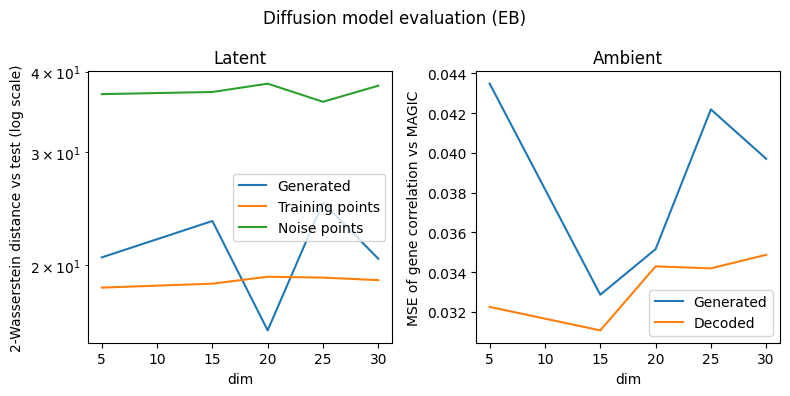

In [11]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
eb_res = results_df[results_df['data'] == 'eb_subset_all']
axes[0].plot(eb_res['emb_dim'], eb_res['w_gen'], label='Generated')
axes[0].plot(eb_res['emb_dim'], eb_res['w_train'], label='Training points')
axes[0].plot(eb_res['emb_dim'], eb_res['w_noise'], label='Noise points')
axes[0].set_xlabel('dim')
axes[0].set_ylabel('2-Wasserstein distance vs test (log scale)')
axes[0].legend()
axes[0].set_yscale('log')
axes[0].set_title('Latent')
axes[1].plot(eb_res['emb_dim'], eb_res['mse_gen'], label='Generated')
axes[1].plot(eb_res['emb_dim'], eb_res['mse_dec'], label='Decoded')
axes[1].set_xlabel('dim')
axes[1].set_ylabel('MSE of gene correlation vs MAGIC')
axes[1].legend()
axes[1].set_title('Ambient')
plt.suptitle('Diffusion model evaluation (EB)')
plt.tight_layout()
plt.show()

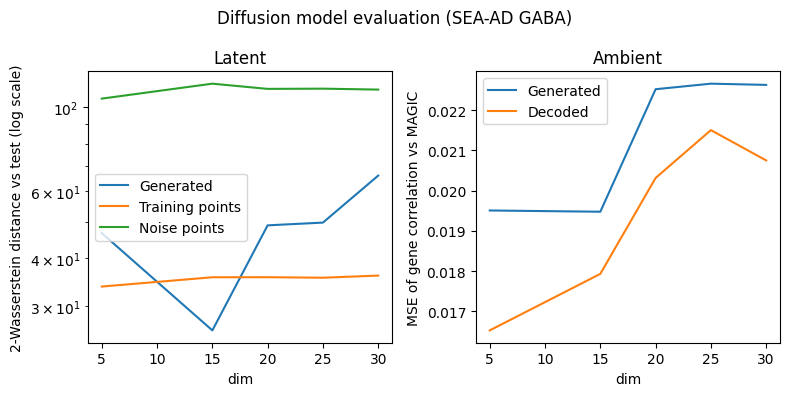

In [12]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
eb_res = results_df[results_df['data'] == 'sea_ad_gaba_all']
axes[0].plot(eb_res['emb_dim'], eb_res['w_gen'], label='Generated')
axes[0].plot(eb_res['emb_dim'], eb_res['w_train'], label='Training points')
axes[0].plot(eb_res['emb_dim'], eb_res['w_noise'], label='Noise points')
axes[0].set_xlabel('dim')
axes[0].set_ylabel('2-Wasserstein distance vs test (log scale)')
axes[0].legend()
axes[0].set_yscale('log')
axes[0].set_title('Latent')
axes[1].plot(eb_res['emb_dim'], eb_res['mse_gen'], label='Generated')
axes[1].plot(eb_res['emb_dim'], eb_res['mse_dec'], label='Decoded')
axes[1].set_xlabel('dim')
axes[1].set_ylabel('MSE of gene correlation vs MAGIC')
axes[1].legend()
axes[1].set_title('Ambient')
plt.suptitle('Diffusion model evaluation (SEA-AD GABA)')
plt.tight_layout()
plt.show()